<a href="https://colab.research.google.com/github/DineshSiddhartha/ML_Assignment3/blob/main/Question3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/45, Loss: 0.5838409923762083
Epoch 2/45, Loss: 0.30234501012911397
Epoch 3/45, Loss: 0.24725237797945737
Epoch 4/45, Loss: 0.21258473729093869
Epoch 5/45, Loss: 0.18838652179886897
Epoch 6/45, Loss: 0.1700246873808404
Epoch 7/45, Loss: 0.15788948983574908
Epoch 8/45, Loss: 0.14964378490423164
Epoch 9/45, Loss: 0.14189729251898825
Epoch 10/45, Loss: 0.13324499283296368
Epoch 11/45, Loss: 0.1262091662703703
Epoch 12/45, Loss: 0.12529692681816718
Epoch 13/45, Loss: 0.11822198616030316
Epoch 14/45, Loss: 0.11520834487552443
Epoch 15/45, Loss: 0.11028471359983087
Epoch 16/45, Loss: 0.1083120172843337
Epoch 17/45, Loss: 0.1028492144929866
Epoch 18/45, Loss: 0.10246035830117763
Epoch 19/45, Loss: 0.098386490123036
Epoch 20/45, Loss: 0.09571478353502849
Epoch 21/45, Loss: 0.09263569025788457
Epoch 22/45, Loss: 0.09470679030908892
Epoch 23/45, Loss: 0.0883589979680255
Epoch 24/45, Loss: 0.08888253755712261
Epoch 25/45, Loss: 0.08608836827799678
Epoch 26/45, Loss: 0.08321676305805643
Epo

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression F1-Score: 0.9207244606130216
Logistic Regression Confusion Matrix:
 [[ 955    0    1    3    1    6    7    3    3    1]
 [   0 1119    5    1    0    1    3    1    5    0]
 [   4   12  922   17    9    4   12   11   39    2]
 [   4    1   19  917    1   26    3   10   24    5]
 [   1    2    6    3  916    0    7    7   10   30]
 [  12    4    4   41    9  761   15    8   33    5]
 [   9    3    8    2    6   20  906    2    2    0]
 [   2    4   22   10    5    1    0  944    5   35]
 [   9   13    5   23    7   26    9   12  859   11]
 [   9    7    1   10   25    6    0   21    9  921]]
Random Forest F1-Score: 0.9680767098076215
Random Forest Confusion Matrix:
 [[ 969    0    0    0    0    3    3    1    3    1]
 [   0 1121    2    5    1    1    2    0    3    0]
 [   6    0  997    6    2    0    3   10    7    1]
 [   0    0   13  969    0    9    0    9    7    3]
 [   2    0    2    1  953    0    4    0    2   18]
 [   3    0    1   15    3  855    6    

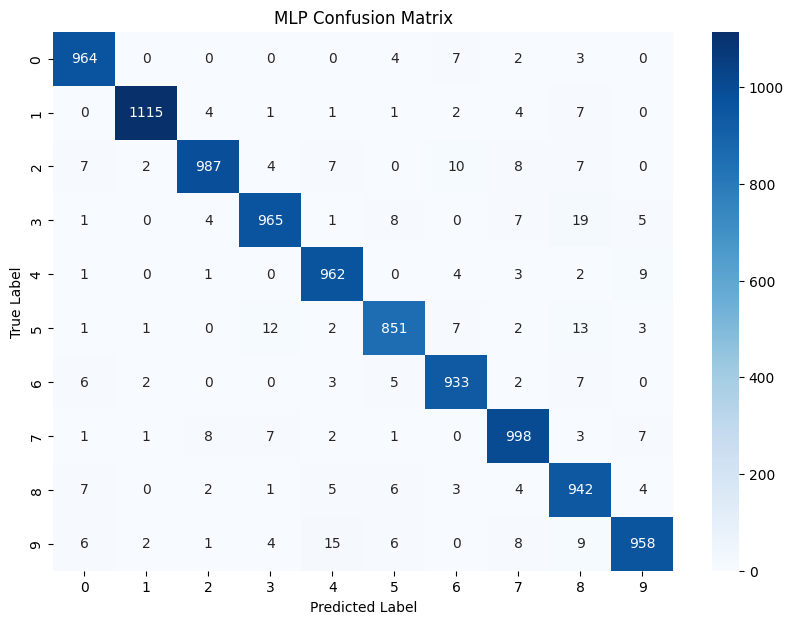

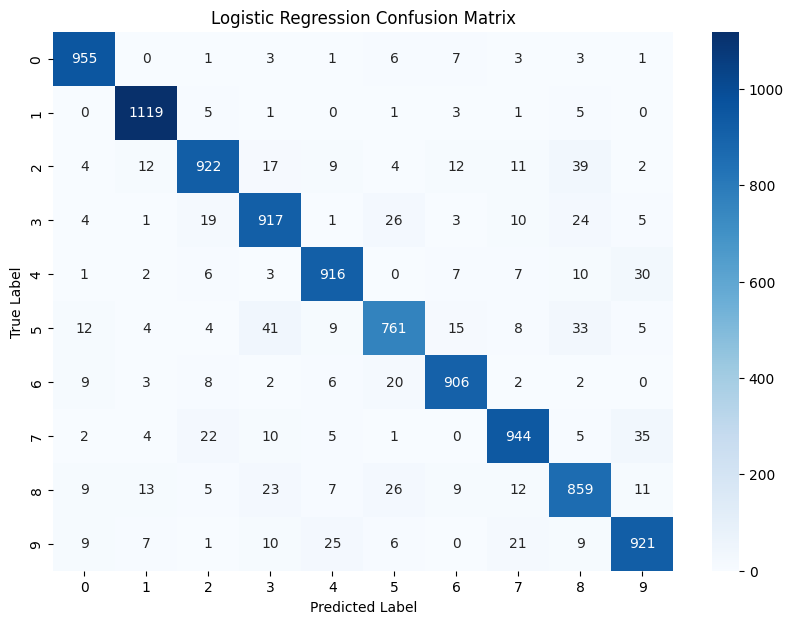

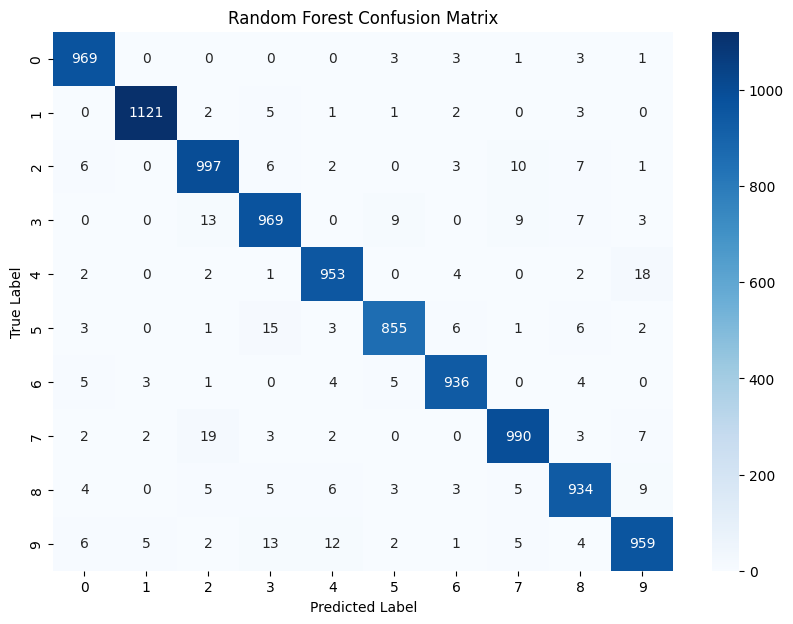

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

torch.manual_seed(0)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 30)
        self.layer2 = nn.Linear(30, 20)
        self.output_layer = nn.Linear(20, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.layer1(x))
        embedding = torch.relu(self.layer2(x))
        output = self.output_layer(embedding)
        return output, embedding

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_load = DataLoader(train_data, batch_size=100, shuffle=True)
test_load = DataLoader(test_data, batch_size=100, shuffle=False)

mlp_model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)

def train_mlp(model, loader, optimizer, criterion, epochs=45):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in loader:
            optimizer.zero_grad()
            outputs, _ = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(loader)}')

train_mlp(mlp_model, train_load, optimizer, criterion)

def evaluate_mlp(model, loader):
    model.eval()
    preds = []
    labels = []
    with torch.no_grad():
        for images, labels in loader:
            outputs, _ = model(images)
            _, predicted = torch.max(outputs, 1)
            preds.extend(predicted.numpy())
            labels.extend(labels.numpy())
    return np.array(preds), np.array(labels)

mlp_preds, mlp_labels = evaluate_mlp(mlp_model, test_load)

f1_mlp = f1_score(mlp_labels, mlp_preds, average='macro')
conf_mlp = confusion_matrix(mlp_labels, mlp_preds)

print("MLP F1-Score:", f1_mlp)
print("MLP Confusion Matrix:\n", conf_mlp)

train_data_flat = train_data.data.view(-1, 28 * 28).numpy()
train_labels = train_data.targets.numpy()
test_data_flat = test_data.data.view(-1, 28 * 28).numpy()
test_labels = test_data.targets.numpy()

# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(train_data_flat, train_labels)
log_reg_preds = log_reg.predict(test_data_flat)

f1_log_reg = f1_score(test_labels, log_reg_preds, average='macro')
conf_log_reg = confusion_matrix(test_labels, log_reg_preds)

print("Logistic Regression F1-Score:", f1_log_reg)
print("Logistic Regression Confusion Matrix:\n", conf_log_reg)

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_data_flat, train_labels)
rf_preds = rf.predict(test_data_flat)

f1_rf = f1_score(test_labels, rf_preds, average='macro')
conf_rf = confusion_matrix(test_labels, rf_preds)

print("Random Forest F1-Score:", f1_rf)
print("Random Forest Confusion Matrix:\n", conf_rf)

# Visualization of confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(conf_mlp, "MLP Confusion Matrix")
plot_confusion_matrix(conf_log_reg, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(conf_rf, "Random Forest Confusion Matrix")

MLP should generally perform better than Logistic Regression and similarly to Random Forest, as MLPs tend to capture more complex patterns in the data.

here, we got f1-score of random forest is greater than MLP because the ensemble learning methods perform well for simple and structured data liked MNIST dataset. We can improve the performance of MLP by running through more epochs, Increasing the complexity of the MLP (more neurons, layers), Tuning hyperparameters like learning rate and regularization and
Standardizing the input data to optimize training stability.

Logistic Regression might confuse digits that are visually similar (e.g., "3" and "5," "4" and "9") because it lacks hidden layers to capture nuanced patterns.

Common Digit Confusions:

From the confusion matrices, we can expect some common confusions across all models, especially with digits like:

3 and 5: These digits share similar structural features.

4 and 9: Both have circular and angular shapes.

7 and 1: These digits may be misclassified due to their simple line structure.

MLP may show fewer of these confusions, while RF and Logistic Regression could struggle more with such cases.

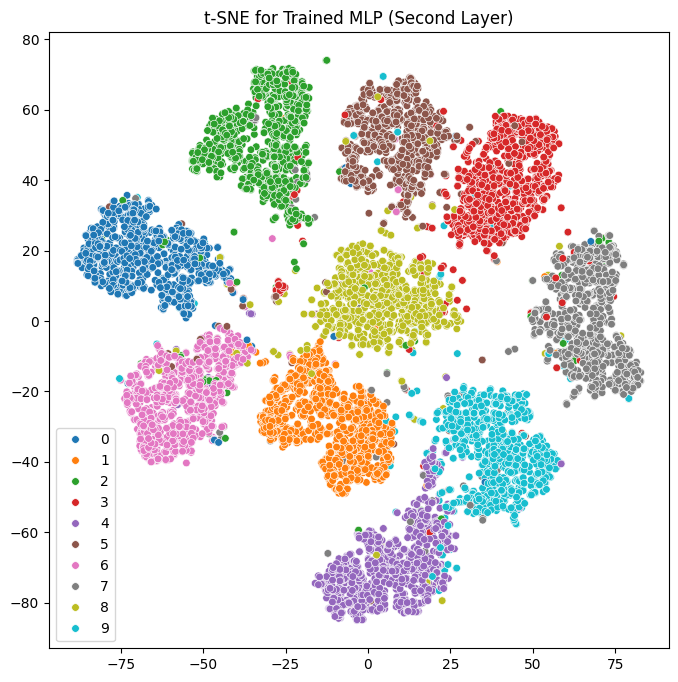

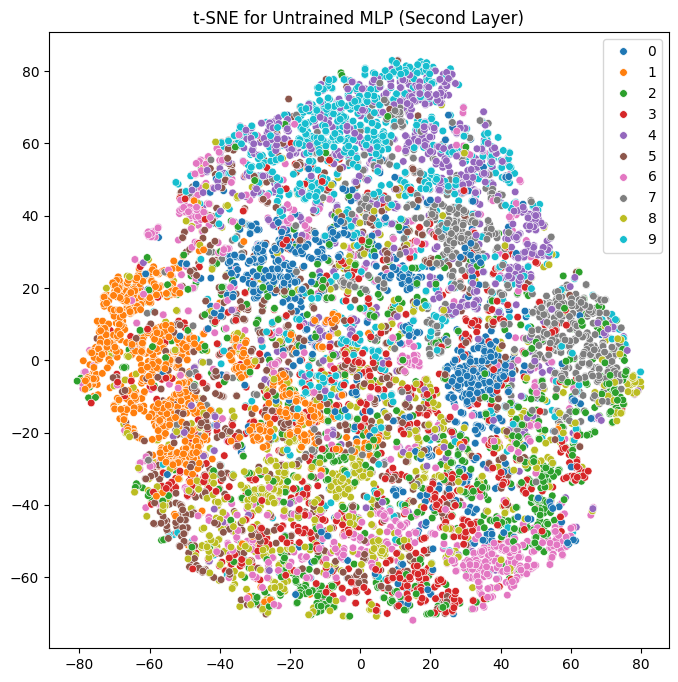

In [ ]:
def plot_tsne(embeddings, labels, title):
    tsne = TSNE(n_components=2, random_state=0)
    embeddings_2d = tsne.fit_transform(embeddings)
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=embeddings_2d[:,0], y=embeddings_2d[:,1], hue=labels, palette='tab10', s=30, legend='full')
    plt.title(title)
    plt.show()

def get_embeddings(model, loader):
    model.eval()
    embeddings_list = []
    labels_list = []
    with torch.no_grad():
        for images, labels in loader:
            _, embeddings = model(images)
            embeddings_list.append(embeddings.numpy())
            labels_list.append(labels.numpy())
    return np.vstack(embeddings_list), np.hstack(labels_list)

trained_embeddings, trained_labels = get_embeddings(mlp_model, test_loader)

untrained_mlp = MLP()
untrained_embeddings, _ = get_embeddings(untrained_mlp, test_loader)

plot_tsne(trained_embeddings, trained_labels, "t-SNE for Trained MLP (Second Layer)")
plot_tsne(untrained_embeddings, trained_labels, "t-SNE for Untrained MLP (Second Layer)")


Observations from t-SNE Plots:

The trained model's t-SNE plot shows clear separations between digit clusters, though some overlaps may exist for visually similar digits.

In comparison, the untrained model's t-SNE plot will lack discernible clusters, telling us how learning from data helps the MLP form meaningful patterns.

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.7MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 201kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.71MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 6.00MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



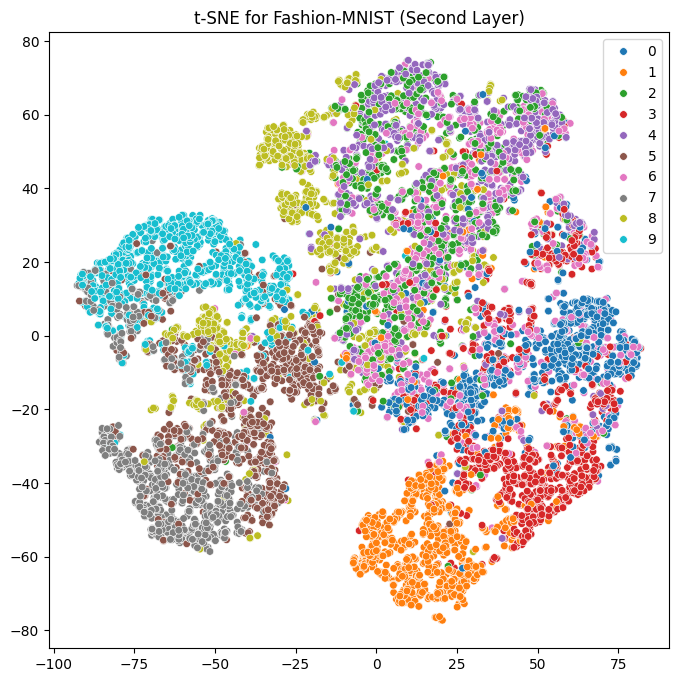

In [ ]:
fashion_train = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
fashion_test = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

fashion_loader = DataLoader(fashion_test, batch_size=100, shuffle=False)

fashion_embeddings, fashion_labels = get_embeddings(mlp_model, fashion_loader)

plot_tsne(fashion_embeddings, fashion_labels, "t-SNE for Fashion-MNIST (Second Layer)")

For Fashion-MNIST, the t-SNE embeddings are less distinct due to the complexity of distinguishing clothing categories.

The embeddings for Fashion-MNIST images may show less distinct clustering because the model's second-layer neurons are tuned for digit patterns rather than for clothes.

We might observe some clusters, but they won't be as well-defined as with the MNIST dataset.

Observations:

This comparison highlights the lack of transferability for MLPs when trained on very different datasets. While MLPs can learn meaningful features for specific tasks, these features don't always generalize well to unrelated tasks without further fine-tuning.